# 08 Top-k evolution

In [3]:
import re
import datetime
import dateutil
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the CSV files

In [4]:
frames = []
for file in iglob('../data/sri/*/reports/08_topk_sri_domain/', recursive=True):
    crawl = re.findall(r'/(\d{4}-\d{2})/', file)
    date = datetime.datetime.strptime(crawl[0] + "-1", "%Y-%W-%w")
    frame = sqlContext.read.parquet(file).toPandas()
    frame['date'] = date
    frame['rank'] = frame.index + 1
    frames.append(frame)
data = pd.concat(frames, ignore_index=True)

## Display the data

In [3]:
data

,domain,number,percentage,date,rank
0,cdn.shopify.com,44367383,40.05,2018-08-20,1
1,maxcdn.bootstrapcdn.com,25079997,22.64,2018-08-20,2
2,code.jquery.com,12365060,11.16,2018-08-20,3
3,cdnjs.cloudflare.com,9671222,8.73,2018-08-20,4
4,use.fontawesome.com,4774805,4.31,2018-08-20,5
5,ajax.googleapis.com,1960622,1.77,2018-08-20,6
6,assets-cdn.github.com,1798929,1.62,2018-08-20,7
7,assets.publishing.service.gov.uk,1213362,1.10,2018-08-20,8
8,unpkg.com,1116657,1.01,2018-08-20,9
9,stackpath.bootstrapcdn.com,1066799,0.96,2018-08-20,10


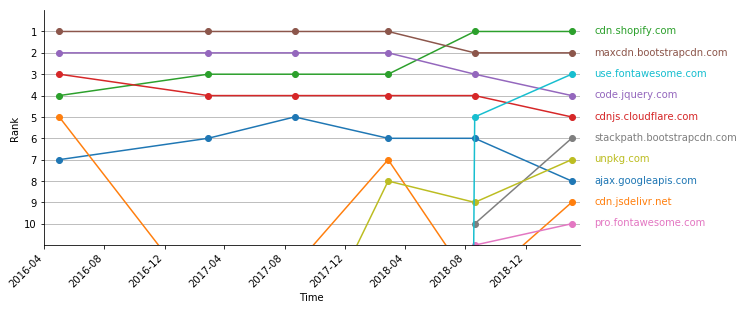

In [21]:
plot, ax = plt.subplots(1, 1)

limit = 10

plt.rcParams["figure.figsize"] = (9.6, 4.8)

groups = data.groupby(['domain'])
for name, group in groups:
    now = dateutil.parser.parse("2019-03-04")
    rank = max(group['rank'].loc[group['date']==now], default=1000)
    if (rank <= limit):
        group = group.set_index('date')
        ax = group['rank'].plot(style='o-')
        color = ax.get_lines()[-1].get_color()
        plt.text(dateutil.parser.parse("2019-03-20") + datetime.timedelta(days=30), rank + 0.1, name, color=color)
        
plt.gca().invert_yaxis()
plt.yticks(range(1, limit + 1))
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Rank')
plt.xlim(datetime.date(2016, 4, 1), datetime.date(2019, 3, 20))
plt.ylim(limit + 1, 0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

plt.savefig('08_topk_evolution.pdf', bbox_inches = 'tight')

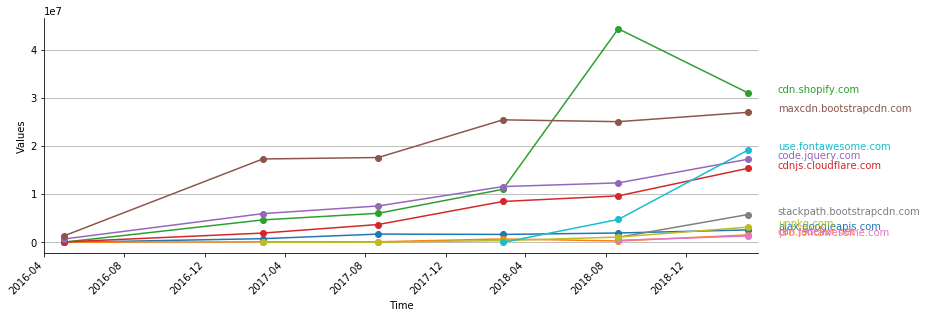

In [20]:
plot, ax = plt.subplots(1, 1)

limit = 10

plt.rcParams["figure.figsize"] = (9.6, 4.8)

groups = data.groupby(['domain'])
for name, group in groups:
    now = dateutil.parser.parse("2019-03-04")
    rank = max(group['rank'].loc[group['date']==now], default=1000)
    pos = max(group['number'].loc[group['date']==now], default=1000)
    if (rank <= limit):
        group = group.set_index('date')
        ax = group['number'].plot(style='o-')
        color = ax.get_lines()[-1].get_color()
        plt.text(dateutil.parser.parse("2019-03-20") + datetime.timedelta(days=30), pos, name, color=color)
        
#plt.gca().invert_yaxis()
#plt.yticks(range(1, limit + 1))
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Values')
plt.xlim(datetime.date(2016, 4, 1), datetime.date(2019, 3, 20))
#plt.ylim(limit + 1, 0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

plt.savefig('08_topk_evolution_occurences.pdf', bbox_inches = 'tight')